# Single-Layer Neural Network



A **single-layer neural network** (also called **perceptron**) is the simplest neural network with:
- An **input layer** (features).
- An **output layer** (prediction).
- **No hidden layers**.

It **learns a linear decision boundary** to classify or regress.

---

## Mathematical Formulation

Given:
- Input vector:
$$
\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top
$$
- Weight vector:
$$
\mathbf{w} = [w_1, w_2, \ldots, w_n]^\top
$$
- Bias term:
$$
b
$$

The **linear combination**:
$$
z = \mathbf{w}^\top \mathbf{x} + b = \sum_{i=1}^n w_i x_i + b
$$

Apply an **activation function** $\sigma(z)$ to get the **output**:
$$
\hat{y} = \sigma(z)
$$

---

##  Activation Functions

Common choices:
- **Identity:** $$\sigma(z) = z$$ (Regression).
- **Step:** $$\sigma(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ 0 & \text{if } z < 0 \end{cases}$$ (Perceptron for binary classification).
- **Sigmoid:** $$\sigma(z) = \frac{1}{1 + e^{-z}}$$ (Smooth classification).

---

##  Learning (Gradient Descent)

To train:
1. **Define a loss function** (e.g., MSE for regression):
$$
L = \frac{1}{2} (\hat{y} - y)^2
$$
2. **Compute gradients**:
$$
\frac{\partial L}{\partial w_j} = (\hat{y} - y) \cdot \sigma'(z) \cdot x_j
$$
$$
\frac{\partial L}{\partial b} = (\hat{y} - y) \cdot \sigma'(z)
$$
3. **Update weights**:
$$
w_j \leftarrow w_j - \eta \cdot \frac{\partial L}{\partial w_j}
$$
$$
b \leftarrow b - \eta \cdot \frac{\partial L}{\partial b}
$$
where $\eta$ is the learning rate.

---

##  Summary

1.  **Single-layer NN learns a linear boundary** using weighted sums + activation.  
2.  Uses **gradient descent** to update weights based on prediction error.  
3. Foundation for deeper networks and practical understanding of perceptron learning.

---

## Practical Example (to run next)

After this intro, implement:
- Data: 2D points, binary labels.
- Single-layer NN with sigmoid.
- Train using gradient descent.
- Visualize decision boundary.

---



# All the possible activation function

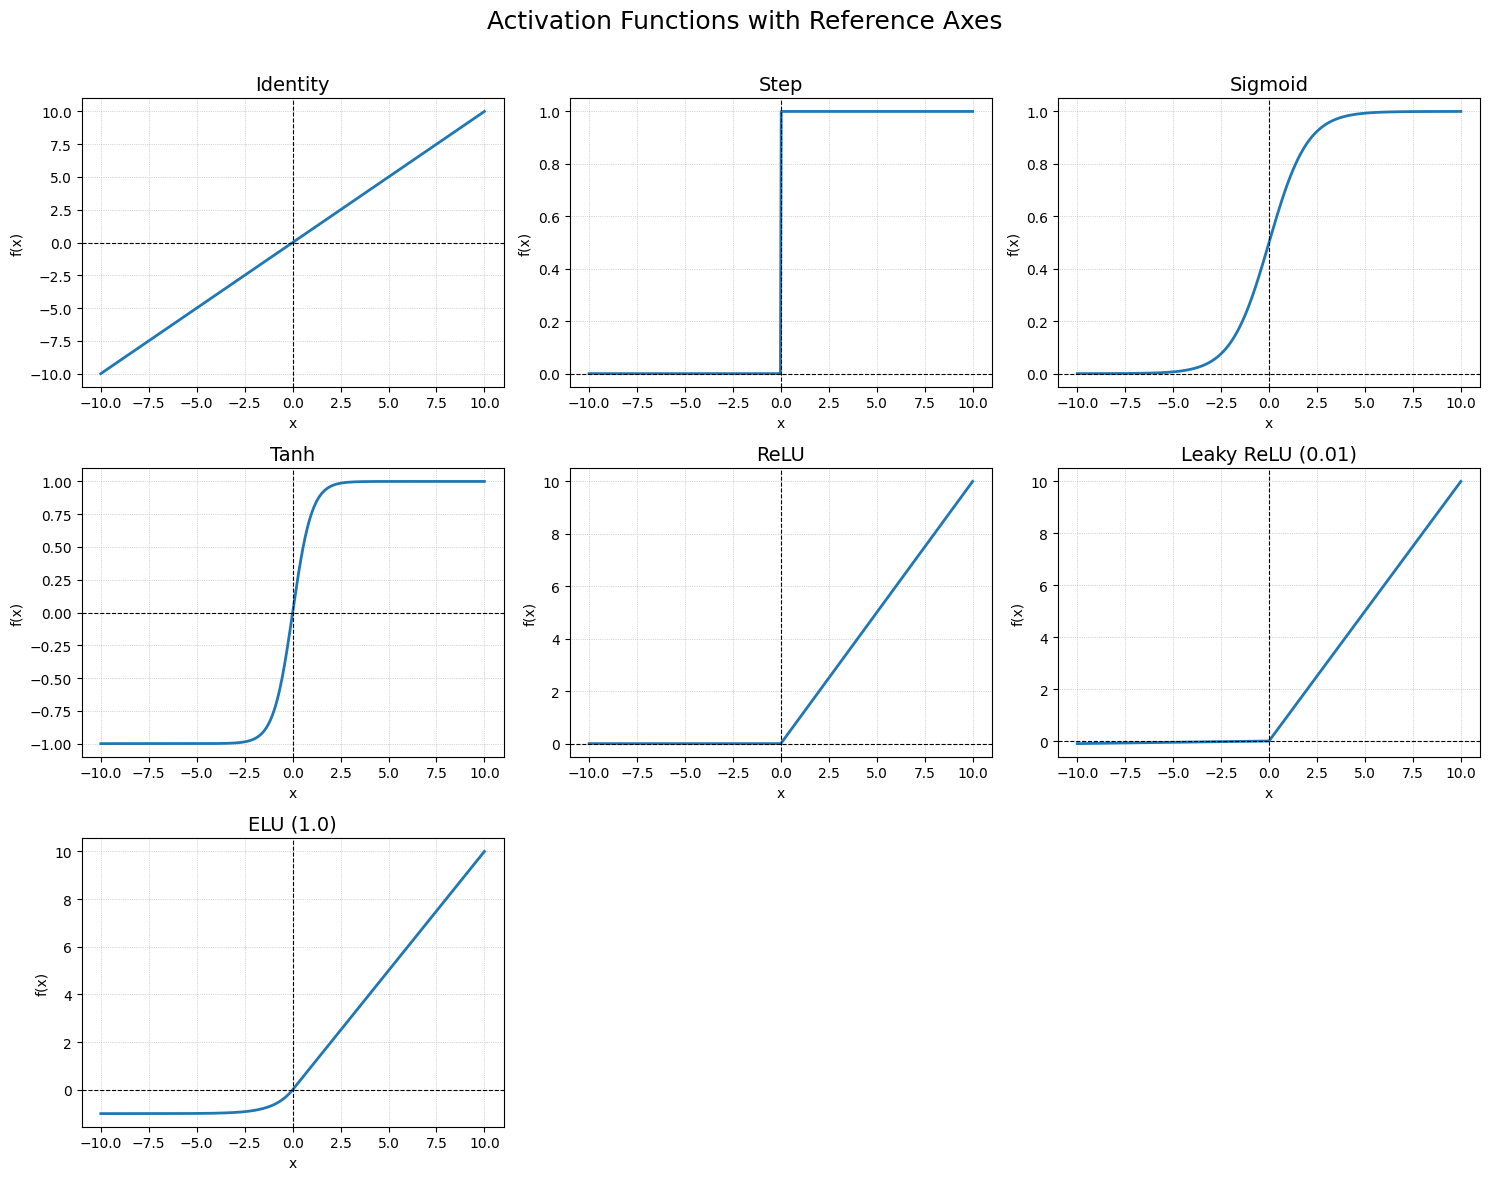

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input range
x = np.linspace(-10, 10, 500)

# Activation functions
def identity(x):
    return x

def step(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# List of functions and labels
activations = [
    (identity, 'Identity'),
    (step, 'Step'),
    (sigmoid, 'Sigmoid'),
    (tanh, 'Tanh'),
    (relu, 'ReLU'),
    (leaky_relu, 'Leaky ReLU (0.01)'),
    (elu, 'ELU (1.0)')
]

# Plot using subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, (func, name) in enumerate(activations):
    y = func(x)
    ax = axes[i]
    ax.plot(x, y, linewidth=2)
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')  # X-axis
    ax.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Y-axis
    ax.set_title(name, fontsize=14)
    ax.grid(True, linestyle=':', linewidth=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')

# Remove unused subplots
for j in range(len(activations), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Activation Functions with Reference Axes', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Dataset for AND
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y = np.array([0,0,0,1])


In [ ]:
# initialize weights and bias
np.random.seed(42)
w=np.random.randn(2)
b=0.0

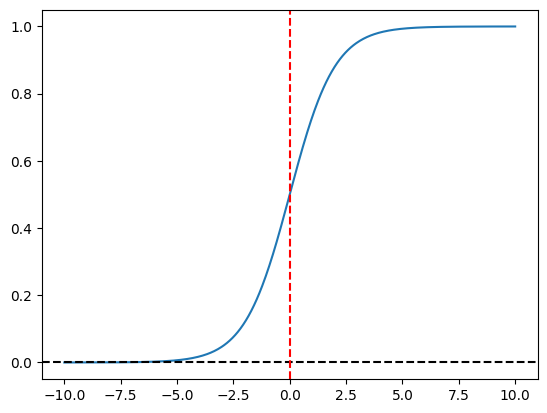

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

x =np.linspace(-10,10,500)

plt.plot(x,sigmoid(x))
plt.axhline(0,color='black', linestyle='--')
plt.axvline(0,color='red', linestyle='--')

In [ ]:
# defining parameters
lr = 0.01
epochs=50000

In [ ]:
for epoch in range(epochs):
  for i in range(len(X)):

    xi=X[i]
    yi=y[i]

    z=np.dot(w,xi)+b
    sigma = sigmoid(z)
    error = sigma - yi
    grad_w = 2*error*sigma*(1-sigma)*xi
    grad_b=2*error*sigma*(1-sigma)
    w -=lr*grad_w
    b -=lr*grad_b



In [ ]:
# Final weights and bias
print(f"Trained weights: {w}, bias: {b}")

Trained weights: [5.47811497 5.47804202], bias: -8.309681349678527


In [ ]:
#calculating loss

loss = 0

for xi,yi in zip(X,y):
  z = np.dot(w,xi)+b
  sigma=sigmoid(z)
  loss +=(sigma-yi)**2

loss/=len(X)

print(f"MSE:{loss}")

MSE:0.0026437537342284823


[-0.5        -0.27777778 -0.05555556  0.16666667  0.38888889  0.61111111
  0.83333333  1.05555556  1.27777778  1.5       ] [2.01691385 1.79468867 1.57246349 1.35023831 1.12801313 0.90578795
 0.68356276 0.46133758 0.2391124  0.01688722]


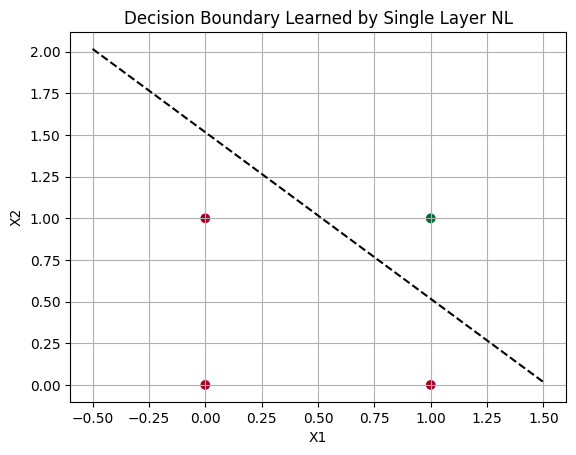

In [ ]:
x_1_values = np.linspace(-0.5,1.5,10)
x_2_values = - (w[0]*x_1_values+b)/w[1]

print(x_1_values,x_2_values)


plt.plot(x_1_values,x_2_values,'k--')
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary Learned by Single Layer NL')
plt.grid(True)